# Conditioning and Stability

In [1]:
import numpy as np
import scipy.linalg
import sympy as sy
from matplotlib import pyplot as plt
import math

## Problem 1

In [2]:
def myfun1(A):
    sigma = scipy.linalg.svdvals(A)
    if sigma.min()==0:
        return np.inf
    else:
        K_A=sigma.max()/sigma.min()
        return K_A       

In [3]:
A = np.array([[1, 2,1], [-2, 1, -2], [-3, 2, 4]])

In [4]:
myfun1(A)

2.6856781881635103

## Problem 2

In [5]:
def myfun2(maxiter):
    w_roots = np.arange(1, 21)
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    
    plt.scatter(w_roots, np.zeros(20), label="Original")
    plt.ylabel("imaginary")
    plt.xlabel("real")
    for ii in range(maxiter+1):
        r = np.random.normal(1, 1e-10, 21)
        new_coeffs = w_coeffs*r
        new_roots = np.roots(np.poly1d(new_coeffs))
        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)
        plt.scatter(new_roots.real,new_roots.imag, marker='.', color="black", s=0.4)
        if ii == (maxiter):
            plt.scatter(new_roots.real,new_roots.imag, marker='.', color="black", s=0.4, label="Pertubed")
    plt.legend()
    plt.show()
    k = scipy.linalg.norm(new_roots - w_roots, np.inf) / scipy.linalg.norm(r, np.inf)
    relative = k * scipy.linalg.norm(w_coeffs, np.inf) / scipy.linalg.norm(w_roots, np.inf)
    
    return k, relative, new_roots, w_roots, r

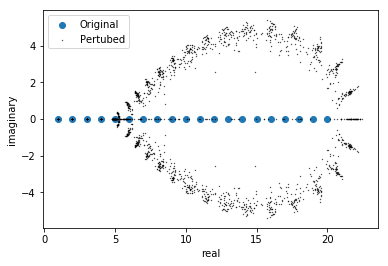

Absolute Condition Number: 4.815566818466978; Relative Condition Number: 3.32364637198610e+18


In [6]:
k, relative, new_roots, w_roots,r=myfun2(100)
print("Absolute Condition Number: " + str(k)+"; Relative Condition Number: "+str(relative))

## Problem 3

In [7]:
def myfun3(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    
    lam = scipy.linalg.eigvals(A)
    lam_hat = scipy.linalg.eigvals(A+H)
    
    K_A_hat = scipy.linalg.norm(lam-lam_hat)/scipy.linalg.norm(H) #relative
    K_A = scipy.linalg.norm(A)/scipy.linalg.norm(lam)*K_A_hat #absolute
    
    return K_A_hat, K_A

In [8]:
K_A_hat, K_A=myfun3(A)
print("relative: "+str(K_A_hat), "absolute: "+str(K_A))

relative: 0.782826447571593 absolute: 0.9161011725885179


## Problem 4

In [9]:
def myfun4(xmin, xmax, ymin, ymax, res):
    xgrid=np.linspace(xmin,xmax,res)
    ygrid=np.linspace(ymin,ymax,res)
    condnum=np.zeros((res,res))
    
    for ii in range(res):
        for jj in range(res):
            A=np.array([[1,xgrid[ii]], [ygrid[jj],1]])
            condnum[ii,jj]=myfun3(A)[0]
    plt.pcolormesh(xgrid, ygrid, condnum, cmap='gray_r')
    plt.colorbar()
    return    

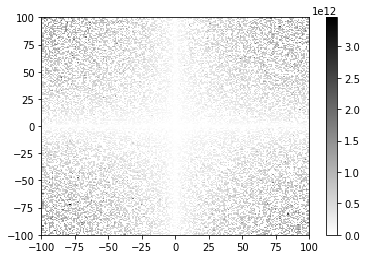

In [10]:
myfun4(-100,100,-100,100,200)

## Problem 5

In [17]:
def myfun5(n):    
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    c_1=np.dot(np.dot(scipy.linalg.inv(np.dot(A.T,A)),A.T),yk)
    c_1poly= np.polyval(c_1, xk)
    forward_error_normal= scipy.linalg.norm(np.dot(A,c_1) - yk)

    Q,R= scipy.linalg.qr(A,mode='economic')
    c_2= scipy.linalg.solve_triangular(R, np.dot(Q.T,yk))
    c_2poly= np.polyval(c_2, xk)
    
    plt.plot(xk,yk, '*', markersize=2, c='black')
    plt.plot(xk,c_1poly, label="Normal Equations")
    plt.plot(xk,c_2poly, label="QR Solver")
    forward_error_QR= scipy.linalg.norm(np.dot(A,c_2) - yk)
    return print("Forward Error Normal: "+str(forward_error_normal)+"; Forward Error QR Solver: "+str(forward_error_QR))


[ -30.70441775  110.10038599 -124.23620085   44.05607784    0.32482047
    1.02589553]
Forward Error Normal: 4.854970503107441; Forward Error QR Solver: 4.85497050310744


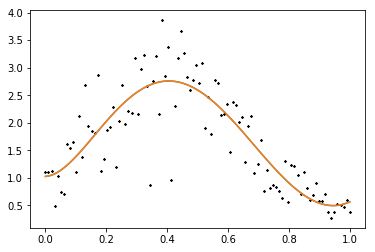

In [18]:
myfun5(5)

Forward Error Normal: 4.649618797079317; Forward Error QR Solver: 4.644309587544681


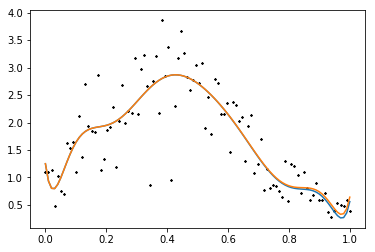

In [13]:
myfun5(10)

Forward Error Normal: 21.105759497913752; Forward Error QR Solver: 4.593408026933323


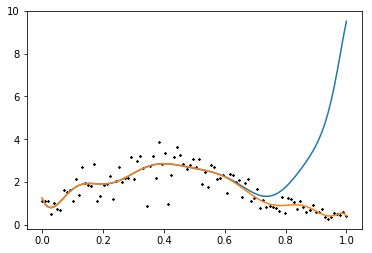

In [14]:
myfun5(12)

Forward Error Normal: 182.47535246459793; Forward Error QR Solver: 4.593389524171301


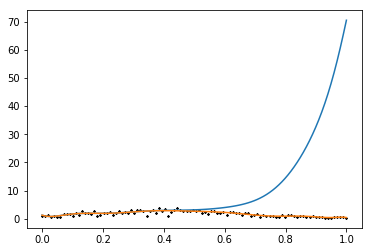

In [15]:
myfun5(13)

Forward Error Normal: 396.94219827796326; Forward Error QR Solver: 4.568370941902039


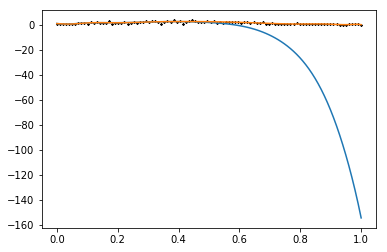

In [16]:
myfun5(14)

Forward Error Normal: 82.01128142497936; Forward Error QR Solver: 4.520415269147983


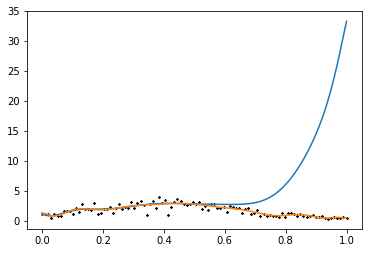

In [34]:
myfun5(16)

## Problem 6

In [18]:
def myfun6(n):
    x=sy.symbols('x')
    err=[]
    for ii in n:
        n2=int(ii)
        integral1= sy.integrate((x**n2*math.e**(x-1)),(x,0,1))
        integral2= (-1)**n2*sy.subfactorial(n2)+(-1)**(n2+1)*sy.factorial(n2)/math.e
        #norm does not work for me here
        forward_error_Int= abs(integral1 - integral2)/abs(integral1)
        err.append(forward_error_Int)
    return err
    

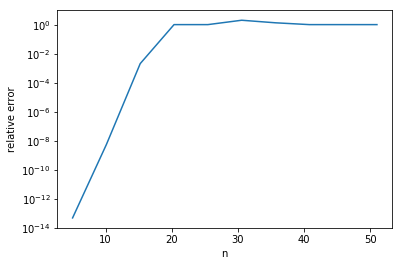

In [19]:
n=np.linspace(5,51,10)
err= myfun6(n)
plt.plot(n,err)
plt.yscale('log')
plt.xlabel("n")
plt.ylabel("relative error")
plt.show()

10.6 is not a stable way due to its subtraction (catastrophic cancellation)